In [7]:
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

def average(list):
    return sum(list)/len(list)

def standarddeviation(list):
    averageofthelist = average(list)
    newlist = [ (elementofthelist - averageofthelist)**2 for elementofthelist in list ]
    sigmasquared  = average(newlist)
    sigma = sigmasquared**0.5
    return sigma

def autocorrelation(list, lag):
    xi = list[:-lag]
    xiplust = list[lag:]
    xitimesxiplust = [ i*iplust for (i, iplust) in zip(xi, xiplust) ]
    averageofxitimexiplust = average(xitimesxiplust)
    averageofxi = average(xi)
    averageofxiplust = average(xiplust)
    autocorrelationvalue = averageofxitimexiplust - (averageofxi*averageofxiplust)
    return autocorrelationvalue

def integratedautocorrelation(list):
    selfcorrelation = standarddeviation(list)
    integratedautocorrelationvalues = [1/2]
    for lag in range(1, len(list)):
        normalisedautocorrelation = autocorrelation(list, lag)/selfcorrelation
        integratedautocorrelationvalues.append(integratedautocorrelationvalues[-1] + normalisedautocorrelation)

    return integratedautocorrelationvalues

def error(list):
    baseerror = standarddeviation(list)/((len(list))**0.5)
    integratedautocorrelationvalues = integratedautocorrelation(list)
    for i in range(1,len(integratedautocorrelationvalues)):
        if integratedautocorrelationvalues[i-1] > integratedautocorrelationvalues[i]:
            newerror = ((2*integratedautocorrelationvalues[i])**0.5)*baseerror
            break
    else:
        newerror = ((2*integratedautocorrelationvalues[-1])**0.5)*baseerror
    
    return newerror

def plotwitherror(xvals, yvals, err):
    _, ax = plt.subplots()
    ax.errorbar(xvals, yvals, yerr=err, fmt='.')
    ax.set_title(r"$\int dt \langle ~\mathrm{Tr}(X(t)X(t)) ~ \mathrm{Tr}(X(t + \Delta t)X(t + \Delta t)) ~ \rangle$ vs $\Delta t$ without commutator" )
    plt.savefig("nocomm.png", dpi=500)
    plt.show()

In [8]:

def read(file):
    with open(file, 'r') as f:
        data = f.read()
    
    rows = data.split('\n')[1:-1]
    elements = [row.split(' ')[1:-9] for row in rows]
    corrs = [[] for e in elements[1]]

    for element in elements:
        i=0
        for entry in element:
            corrs[i].append(float(entry))
            i+=1

    averages = []
    for corr in corrs:
        averages.append(average(corr))
    
    return averages
    


In [9]:
nums = [1,2,3,4,5,6,7,8,9,10]

fileaverages = []

for num in nums:
    fileaverages.append(read(f'{num}.dat'))

In [10]:
singlecorrlists = [[] for _ in fileaverages[1]]

for file in fileaverages:
    i = 0
    for entry in file:
        singlecorrlists[i].append(entry)
        i = i+1


In [11]:
newdata = [average(singlecorr) for singlecorr in singlecorrlists]
newerrors = [standarddeviation(singlecorr)/(len(singlecorr)**0.5) for singlecorr in singlecorrlists]
t = [1,2,3,4,5,6,7,8]

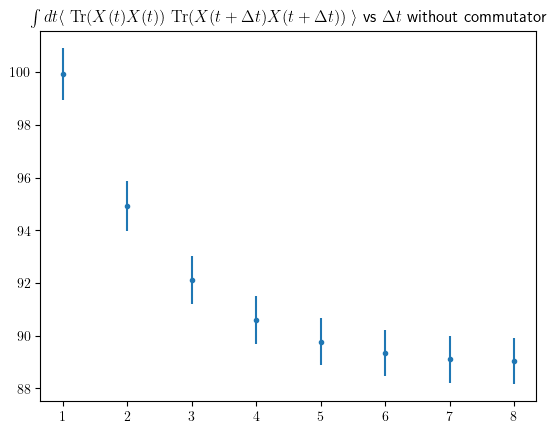

In [12]:
plotwitherror(t, newdata, newerrors)